In [1]:
library(tidyverse)
library(lubridate)
library(stringr)
library(readxl)
library(plyr)
library(dplyr)
library(rstanarm)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
--------

ERROR: Error in library(rstanarm): there is no package called ‘rstanarm’


In [2]:
setwd('/mnt/DP Supply Data')

ERROR: Error in setwd("/mnt/DP Supply Data"): cannot change working directory


In [3]:
getwd()

[1] "/Users/salahuddin/Documents/osd_des_new"

In [7]:
df.all.tab <- read.csv('osd_pre_data_new.csv')
df.all.tab <- subset(df.all.tab, Year > 2016 & Year < 2020 & Program != 'Eliquis (apixaban) (Factor Xa)')
tail(df.all.tab,4)

Warning message in file(file, "rt"):
“cannot open file 'osd_pre_data_new.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


In [16]:
num.camp <- ddply(df.all.tab, c("Phase", "Program", "Campaign", "type"), summarise, sum.batch = sum(Batches), sum.quant = sum(Quantity.Ea, na.rm=TRUE)/1000)
print(num.camp)

    Phase                          Program                  Campaign type
1     ECN                 IDO Inhibitor #2 BMS-986242_Ext_campaign_1  TAB
2     ECN                 IDO Inhibitor #2 BMS-986242_Int_campaign_1  TAB
3     ECN                TGF Beta Receptor BMS-986260_Int_campaign_1  TAB
4     ECN                TGF Beta Receptor BMS-986260_Int_campaign_2  TAB
5       I                              APJ BMS-986224_Int_campaign_1  CAP
6       I                              APJ BMS-986224_Int_campaign_2  TAB
7       I                              BET BMS-986158_Int_campaign_1  CAP
8       I                              BET BMS-986158_Int_campaign_2  CAP
9       I                              BET BMS-986158_Int_campaign_3  CAP
10      I                          BTK Max BMS-986195_Ext_campaign_1  CAP
11      I                          BTK Max BMS-986195_Int_campaign_1  CAP
12      I                          BTK Max BMS-986195_Int_campaign_2  CAP
13      I                          BTK

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


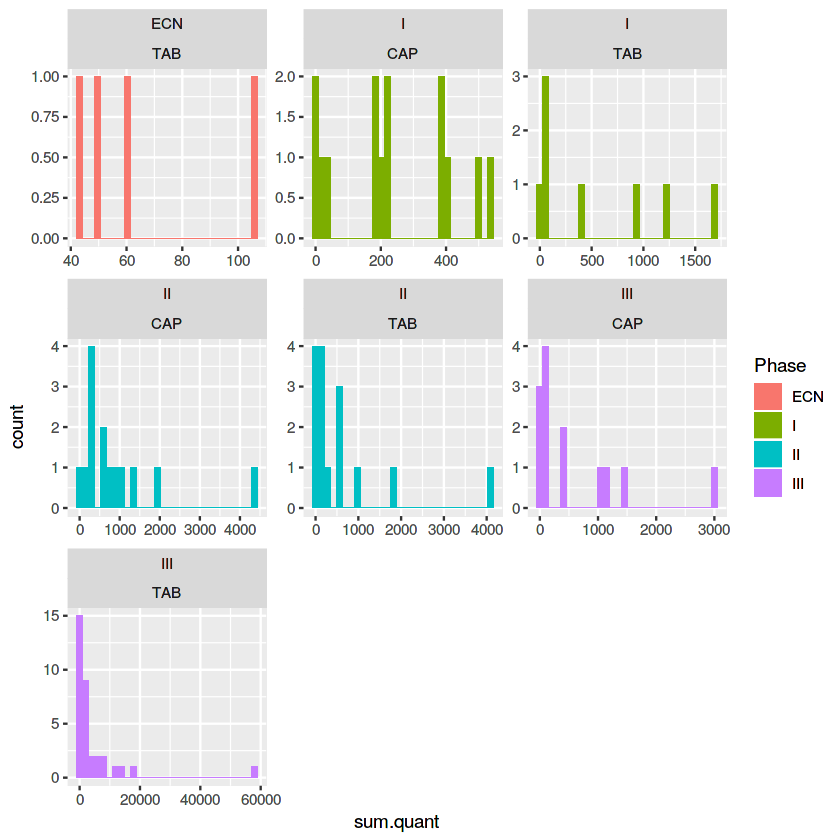

In [6]:
ggplot(data=num.camp, aes(x=sum.quant,fill=Phase)) + geom_histogram() + facet_wrap(~Phase+type, scales="free") 

In [8]:
sum.camp <- ddply(num.camp, c("Phase", "type"), summarise, sum.project.all = length(unique(Program)), sum.camp.all = length(unique(Campaign)), camp.per.project = (sum.camp.all/sum.project.all))
print(sum.camp)

  Phase type sum.project.all sum.camp.all camp.per.project
1   ECN  TAB               2            4         2.000000
2     I  CAP               5           14         2.800000
3     I  TAB               6            8         1.333333
4    II  CAP               5           14         2.800000
5    II  TAB               7           15         2.142857
6   III  CAP               4           13         3.250000
7   III  TAB               7           34         4.857143


In [9]:
percent.cap <- ddply(sum.camp, c("Phase"), summarise, all.camp = sum(sum.camp.all), percent.cap = sum(sum.camp.all[type=="CAP"])*100/all.camp)
print(percent.cap)
                     

  Phase all.camp percent.cap
1   ECN        4     0.00000
2     I       22    63.63636
3    II       29    48.27586
4   III       47    27.65957


In [11]:
camp.data.all <- ddply(df.all.tab, c("Campaign"), summarise, Batches = sum(Batches), Total.Demand = sum(Quantity.Ea)/1000, log.batch = log10(Batches), log.demand = log10(Total.Demand))
camp.data.all <- na.omit(camp.data.all)
print(camp.data.all)

                    Campaign Batches Total.Demand log.batch log.demand
1  BMS-188667_Ext_campaign_1       6     1105.338 0.7781513  3.0434951
2  BMS-188667_Ext_campaign_2       3      410.800 0.4771213  2.6136304
4  BMS-232632_Ext_campaign_1       1        1.576 0.0000000  0.1975562
5  BMS-354825_Ext_campaign_1       2      522.000 0.3010300  2.7176705
6  BMS-354825_Ext_campaign_2       1      351.000 0.0000000  2.5453071
7  BMS-562247_Ext_campaign_1       7    17212.000 0.8450980  4.2358313
8  BMS-562247_Ext_campaign_2       4    13936.600 0.6020600  4.1441568
9  BMS-562247_Ext_campaign_3       8     8868.176 0.9030900  3.9478343
10 BMS-562247_Ext_campaign_4       2     5704.000 0.3010300  3.7561795
11 BMS-562247_Ext_campaign_5       2     8910.600 0.3010300  3.9499069
12 BMS-562247_Int_campaign_1       1      650.000 0.0000000  2.8129134
13 BMS-562247_Int_campaign_2       1     1000.000 0.0000000  3.0000000
14 BMS-562247_Int_campaign_3       1     1500.000 0.0000000  3.1760913
15 BMS

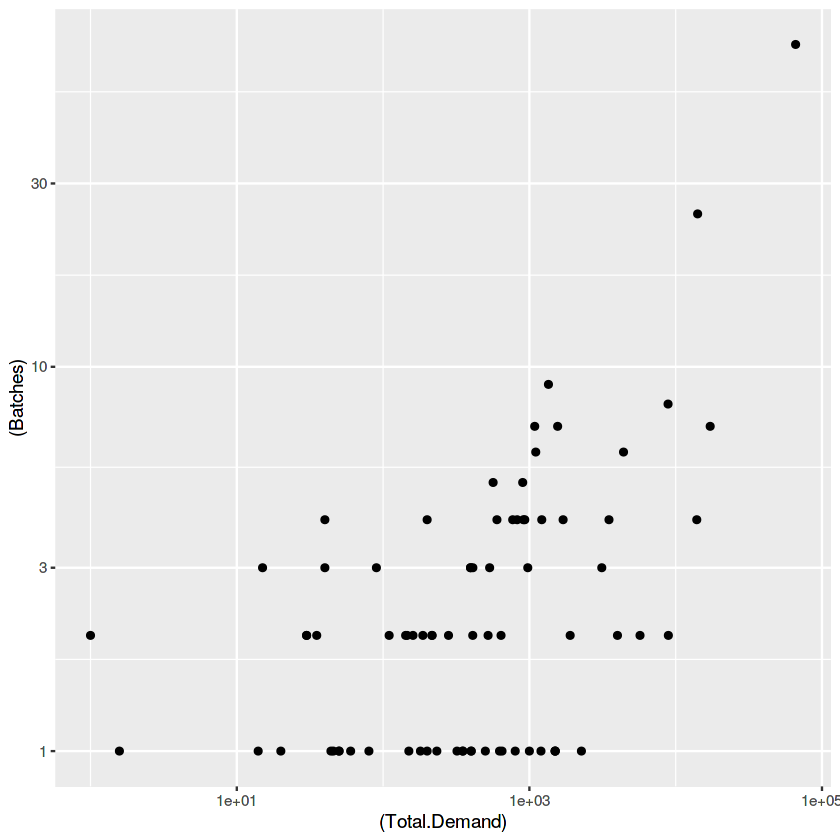

In [12]:
ggplot(data=camp.data.all, aes(x=(Total.Demand),y=(Batches))) + geom_point() + scale_x_log10() + scale_y_log10()

In [13]:
demand.batch.model <- stan_glm(log.batch ~ log.demand, data = camp.data.all)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 4.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.46 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.063412 seconds (Warm-up)
Chain 1:                0.080984 seconds (Sampling)
Chain 1:              

In [14]:
pred_out <- posterior_predict(demand.batch.model, newdata = data.frame(log.demand=camp.data.all$log.demand))
upper <- apply(pred_out,2,function(x) quantile(x,.950))
lower <- apply(pred_out,2,function(x) quantile(x,.05))
camp.data.all <- cbind(camp.data.all, upper, lower)
head(camp.data.all)

,Campaign,Batches,Total.Demand,log.batch,log.demand,upper,lower
1,BMS-188667_Ext_campaign_1,6,1105.338,0.7781513,3.0434951,0.9621535,-0.06326073
2,BMS-188667_Ext_campaign_2,3,410.800,0.4771213,2.6136304,0.8736082,-0.17106153
4,BMS-232632_Ext_campaign_1,1,1.576,0.0000000,0.1975562,0.3978502,-0.67900106
5,BMS-354825_Ext_campaign_1,2,522.000,0.3010300,2.7176705,0.8769431,-0.13845346
6,BMS-354825_Ext_campaign_2,1,351.000,0.0000000,2.5453071,0.8558794,-0.18693155
7,BMS-562247_Ext_campaign_1,7,17212.000,0.8450980,4.2358313,1.2188477,0.17503072


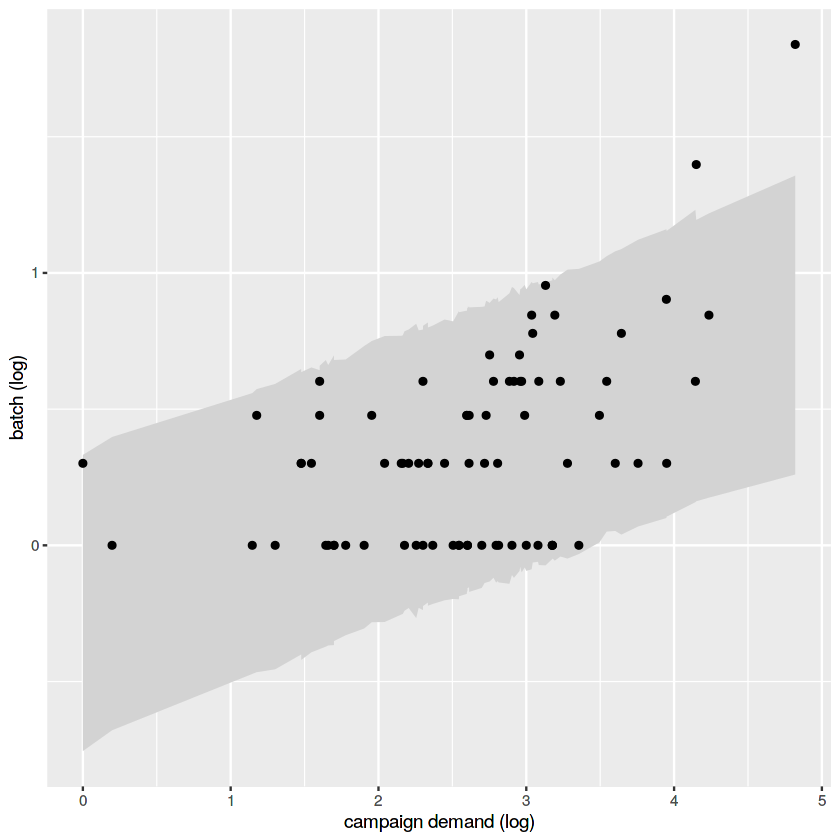

In [15]:
ggplot(data=camp.data.all, aes(x=log.demand, y=log.batch)) + geom_ribbon(aes(ymin=upper, ymax=lower),fill='lightgrey') + geom_point() + xlab("campaign demand (log)") + ylab("batch (log)") 